In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


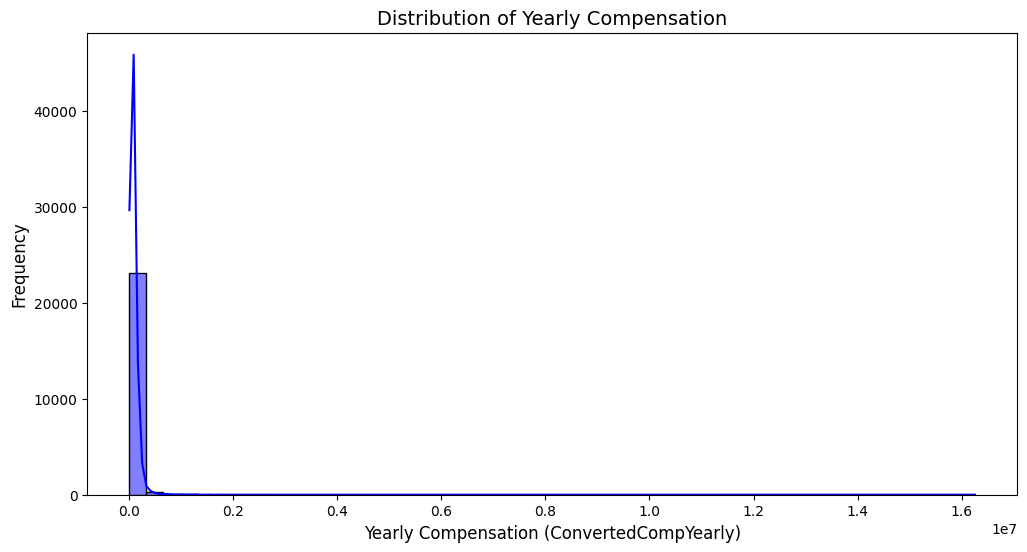

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))


sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, color='blue')


plt.xlabel('Yearly Compensation (ConvertedCompYearly)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Yearly Compensation', fontsize=14)

plt.show()

In [4]:
full_time_df = df[df['Employment'] == 'Employed, full-time']


median_comp_full_time = full_time_df['ConvertedCompYearly'].median()


print(f"Median Yearly Compensation for Full-Time Employees: {median_comp_full_time}")

Median Yearly Compensation for Full-Time Employees: 69814.0


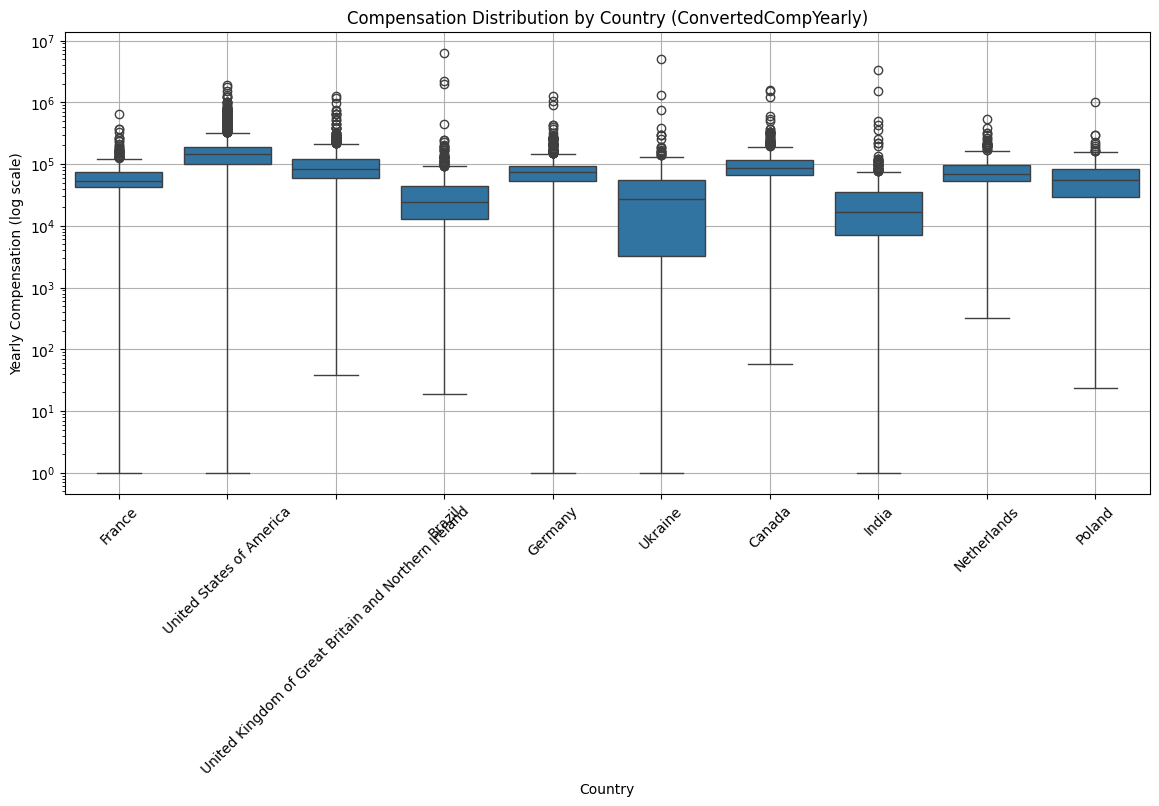

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_filtered = df[df['ConvertedCompYearly'].notna() & (df['ConvertedCompYearly'] > 0)]


top_countries = df_filtered['Country'].value_counts().head(10).index
df_top_countries = df_filtered[df_filtered['Country'].isin(top_countries)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_countries)
plt.xticks(rotation=45)
plt.yscale("log") 
plt.title("Compensation Distribution by Country (ConvertedCompYearly)")
plt.xlabel("Country")
plt.ylabel("Yearly Compensation (log scale)")
plt.grid(True)

plt.show()

In [6]:
import pandas as pd


Q1 = df["ConvertedCompYearly"].quantile(0.25)
Q3 = df["ConvertedCompYearly"].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_refined = df[(df["ConvertedCompYearly"] >= lower_bound) & (df["ConvertedCompYearly"] <= upper_bound)]


print(f"Original dataset size: {df.shape[0]}")
print(f"Refined dataset size (outliers removed): {df_refined.shape[0]}")

Original dataset size: 65437
Refined dataset size (outliers removed): 22457


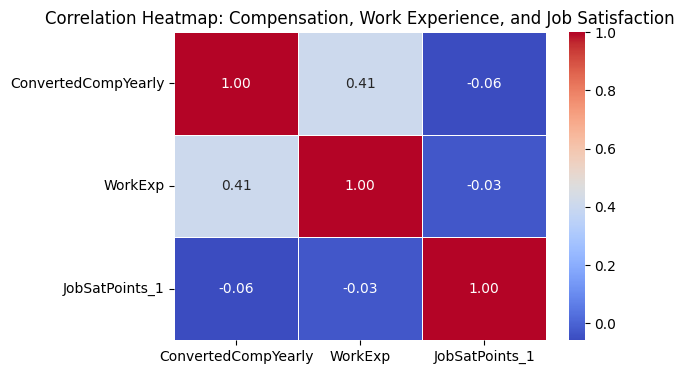

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_columns = ["ConvertedCompYearly", "WorkExp", "JobSatPoints_1"]

corr_matrix = df_refined[corr_columns].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction")
plt.show()